In [155]:
# To do 
#scaling . standardization, minMax scaler 
# Normalization 

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'heart.csv')

# Display the first few rows of the dataset
# print(data.head().to_string())

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# selector = SelectKBest(chi2, k=10)
# x_new = selector.fit_transform(X, y)
# selected_features = X.columns[selector.get_support()]

# print('Selected Features: ', selected_features)




# Data Splitting
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cross validation - evaluate performance of the data 
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print('Cross Validation Accuracy: ', scores.mean())
print(f'Mean cross validation score: {scores.mean():.3f} +/- {scores.std():.3f}')
    


Cross Validation Accuracy:  0.828360655737705
Mean cross validation score: 0.828 +/- 0.053


In [157]:
# Training and evaluating the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Test Score Accuracy: ', accuracy_score(y_test, y_pred))

Test Score Accuracy:  0.8524590163934426


Logistic Regression Accuracy: 0.8032786885245902
Logistic Regression Precision: 0.7692307692307693
Logistic Regression Recall: 0.9090909090909091
Logistic Regression F1: 0.8333333333333334
Logistic Regression ROC AUC: 0.7938311688311689


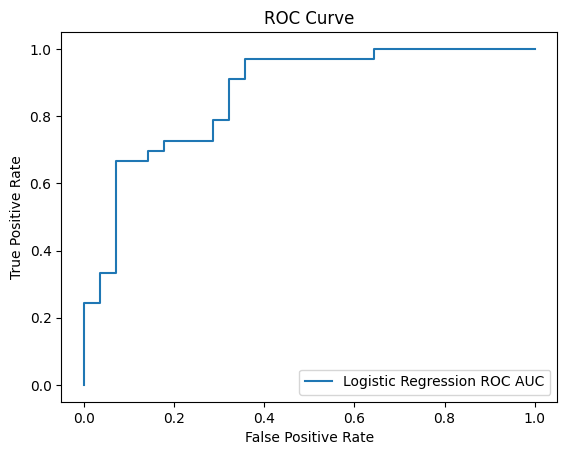

Decision Tree Accuracy: 0.7049180327868853
Decision Tree Precision: 0.7027027027027027
Decision Tree Recall: 0.7878787878787878
Decision Tree F1: 0.7428571428571429
Decision Tree ROC AUC: 0.6975108225108225


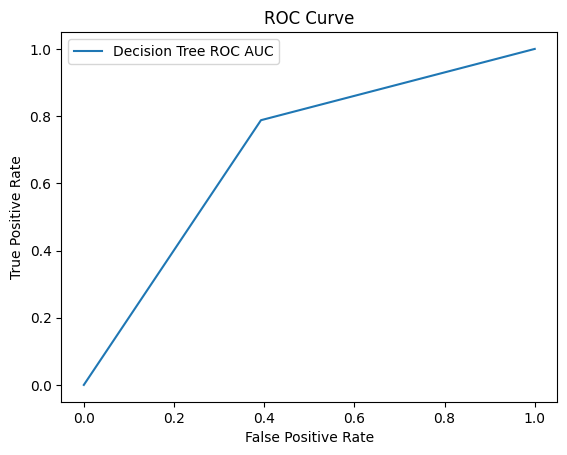

Random Forest Accuracy: 0.8360655737704918
Random Forest Precision: 0.7804878048780488
Random Forest Recall: 0.9696969696969697
Random Forest F1: 0.8648648648648649
Random Forest ROC AUC: 0.8241341991341993


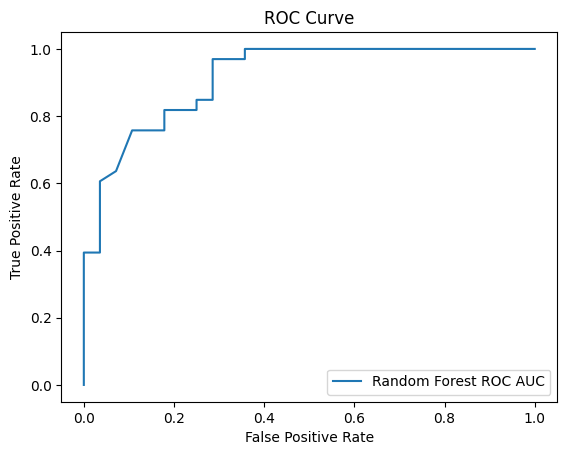

KNN Accuracy: 0.5901639344262295
KNN Precision: 0.625
KNN Recall: 0.6060606060606061
KNN F1: 0.6153846153846154
KNN ROC AUC: 0.5887445887445887


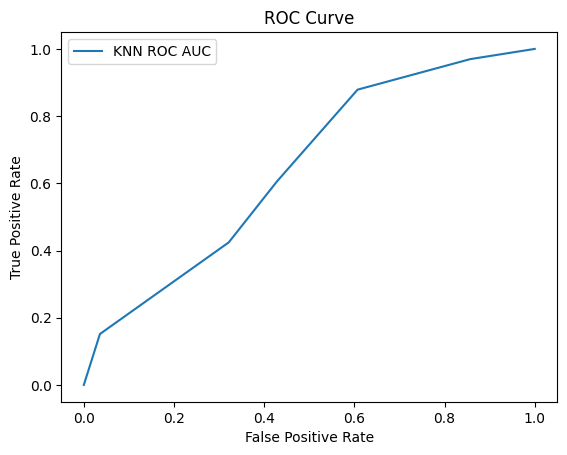

SVM Accuracy: 0.6557377049180327
SVM Precision: 0.65
SVM Recall: 0.7878787878787878
SVM F1: 0.7123287671232876
SVM ROC AUC: 0.6439393939393939


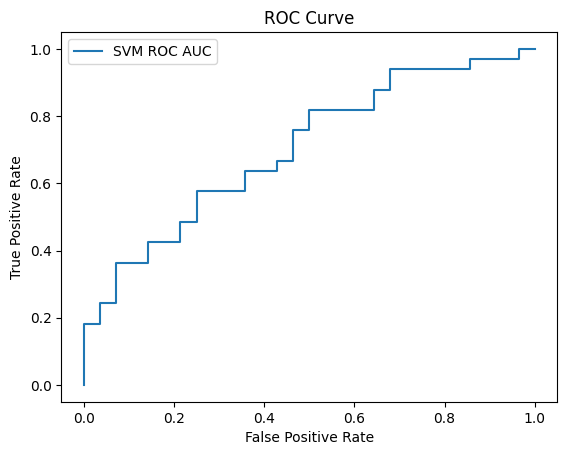

In [158]:
# Classification Accuracy of the Algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42) # to produce same random split of 42.
}

# Evaluate the metrics

metrics = {
    'Accuracy' : accuracy_score,
    'Precision' : precision_score,
    'Recall' : recall_score,
    'F1' : f1_score,
    'ROC AUC' : roc_auc_score
}

# train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
# Calculate metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f'{model_name} {metric_name}: {metric_value}')
        
        if metric_name == 'ROC AUC':
            fpr, tpr, _= roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{model_name} ROC AUC')
            
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.show()
                    
            



# Actionable insight of the models
#things expected to see in models
LR
Best performed model : Logistic Regression 
Precision (0.88), Recall (0.90), F1-score (0.89), ROC AUC (0.91)

Balance model performance: 

#do the same for others 
#KNN

#DT

#RF

Conclusion, eg LR is the best performer model with the highest score metrics

KNeighborsTransformer 

# Recommendation
Models considered for deployment 

Further tuning of the models

Ensemble methods, enhancing performance and robustness

confusion matrix 



In [159]:
#Feature engineering of the data
#Select the top ten features based on the chi-squared test
from sklearn.feature_selection import SelectKBest,chi2
X = df.drop('target',axis=1)
y=df['target']
selector=SelectKBest(chi2,k=10)
X_new=selector.fit_transform(X,y)
selected_features=X.columns[selector.get_support()]
print('Selected Features:',selected_features)

Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [160]:
#cross validation using k-fold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Define the model
model = RandomForestClassifier()

# Define the k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print('Cross Validation Score:', scores.mean())

Cross Validation Score: 0.8150273224043716


In [161]:
#Cross validation using StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the model
model = RandomForestClassifier()

# Define the stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print('Cross Validation Score:', scores.mean())


Cross Validation Score: 0.8250273224043715


In [162]:
#Training and evaluating the model
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('test score accuracy:',accuracy_score(y_test,y_pred))

test score accuracy: 0.8360655737704918


In [163]:
# classification accuracy of the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42) 
}


In [164]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Using logistic regression
# Define the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Test Score Accuracy: 0.8032786885245902
Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [165]:
#using the decision tree
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Test Score Accuracy: 0.7049180327868853
Confusion Matrix:
[[17 11]
 [ 7 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [166]:
#using the random forest
# Define the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Random Forest Test Score Accuracy: 0.8360655737704918
Confusion Matrix:
[[19  9]
 [ 1 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [167]:
#using KNeighborsClassifier
# Define the model
# Define the model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbors (KNN) Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

K-Nearest Neighbors (KNN) Test Score Accuracy: 0.5901639344262295
Confusion Matrix:
[[16 12]
 [13 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.62      0.61      0.62        33

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61



In [168]:
#for the SVM
# Define the model
model = SVC(probability=True, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Support Vector Machine (SVM) Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Support Vector Machine (SVM) Test Score Accuracy: 0.6557377049180327
Confusion Matrix:
[[14 14]
 [ 7 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.65      0.79      0.71        33

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



In [169]:
# evaluate the metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6557377049180327


In [170]:
#Actionable insight of the models
#Logistic Regression: 0.8032786885245902
# Decision Tree :  0.7049180327868853
# K-Nearest Neighbors (KNN) : 0.5901639344262295
# Support Vector Machine (SVM) : 0.6557377049180327
# Random Forest : 0.8360655737704918




In [171]:
#Conclusion
# Random Forest is the best performing model since it has the highest accuracy

In [172]:
#Recommendation
 # I recommend Random Forest model for deployment
    